VALORES IMPORTANTES:
σ(0°)  = -0.238732 C/m²
σ(90°) = -0.021557 C/m²
σ(180°)= -0.008842 C/m²

Parámetros:
Radio esfera (a) = 1.0
Distancia carga (b) = 2.0
Razón a/b = 0.500


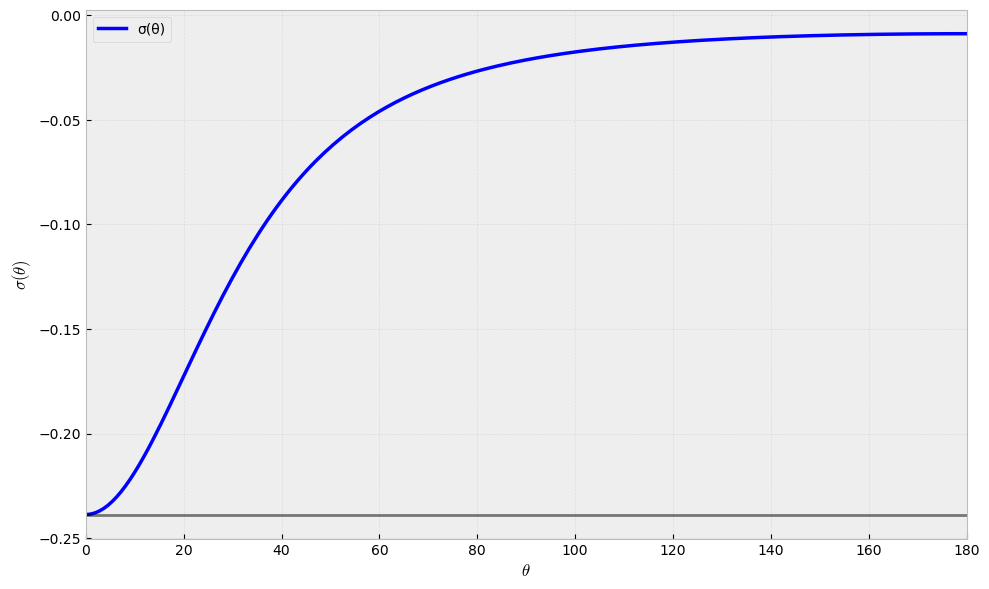

In [31]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("bmh")

# Parámetros del problema
a = 1.0    # Radio de la esfera
b = 2.0    # Distancia de la carga al centro
q = 1.0    # Valor de la carga puntual

def densidad_carga(theta, a=a, b=b, q=q):
    """
    Calcula la densidad de carga superficial inducida
    sigma(theta) = - (q/(4πa)) * (b² - a²)/(a² + b² - 2ab cosθ)^(3/2)
    """
    cos_theta = np.cos(theta)
    denominador = (a**2 + b**2 - 2*a*b*cos_theta)**(1.5)
    sigma = - (q/(4*np.pi*a)) * (b**2 - a**2) / denominador
    return sigma

# Crear array de ángulos theta (de 0 a 180 grados)
theta = np.linspace(0, np.pi, 200)
theta_grados = np.degrees(theta)

# Calcular densidad de carga
sigma = densidad_carga(theta)

# Crear el gráfico
plt.figure(figsize=(10, 6))
plt.plot(theta_grados, sigma, 'b-', linewidth=2.5, label=f'σ(θ)')

# Personalizar el gráfico
plt.xlabel(r'$\theta$', fontsize=12)
plt.ylabel(r'$\sigma(\theta)$', fontsize=12)
plt.grid(True, alpha=0.3)

# Línea en y=0 para referencia


# Marcar puntos importantes
idx_0 = 0  # theta = 0°
idx_90 = np.argmin(np.abs(theta_grados - 90))
idx_180 = -1  # theta = 180°
sigma_max = densidad_carga(0)

plt.axhline(y= sigma_max, color='k', linestyle='-', alpha=0.5)

#plt.axvline(x=0, color='r', linestyle='--', alpha=0.7, label='θ=0° (más cercano)')
#plt.axvline(x=90, color='g', linestyle='--', alpha=0.7, label='θ=90°')
#plt.axvline(x=180, color='orange', linestyle='--', alpha=0.7, label='θ=180° (más lejano)')
#plt.axvline(x=, color='orange', linestyle='--', alpha=0.7, label='θ=180° (más lejano)')

plt.legend(fontsize=10)
plt.xlim(0, 180)

# Mostrar valores numéricos importantes
print("VALORES IMPORTANTES:")
print(f"σ(0°)  = {sigma[idx_0]:.6f} C/m²")
print(f"σ(90°) = {sigma[idx_90]:.6f} C/m²") 
print(f"σ(180°)= {sigma[idx_180]:.6f} C/m²")
print(f"\nParámetros:")
print(f"Radio esfera (a) = {a}")
print(f"Distancia carga (b) = {b}")
print(f"Razón a/b = {a/b:.3f}")

plt.tight_layout()
plt.show()